#  Preprocessing:

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('/kaggle/input/telco-churn-csv/Telco-churn.csv')
print('\nSome initial data is:\n',df.head())
print('\nNumber of columns in the dataset:\n')
df.info()

cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('\nCategorical columns in the dataset are:\n',cat_cols)
print('\nNumerical columns in the dataset are:\n',num_cols)

#Drop customerID column:
df.drop("customerID",axis=1,inplace=True)

#After droping customerID column:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df['TotalCharges'].fillna(df['TotalCharges'].median())

le = LabelEncoder()
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

multi_cat_cols = list(set(cat_cols) - set(binary_cols))
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)
print("Final shape:", df.shape)
print(df.head())


Some initial data is:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMov

# Train-Test Split:

In [2]:
from sklearn.model_selection import train_test_split
X=df.drop('Churn',axis=1)
y=df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# Print shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Check churn distribution in train vs test
print("\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nChurn distribution in test set:")
print(y_test.value_counts(normalize=True))
  #Training vs Testing set shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Shape of X_train: (5634, 6558)
Shape of X_test: (1409, 6558)
Shape of y_train: (5634,)
Shape of y_test: (1409,)

Churn distribution in training set:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in test set:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64
Training set shape: (5634, 6558) (5634,)
Testing set shape: (1409, 6558) (1409,)


# Model Training:

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

#Train the model on training data
log_reg.fit(X_train, y_train)

#Predict on the test set
y_pred = log_reg.predict(X_test)

#Evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy on test set: 0.794889992902768

Confusion Matrix:
[[918 117]
 [172 202]]


# Evaluation:

Accuracy: 0.794889992902768


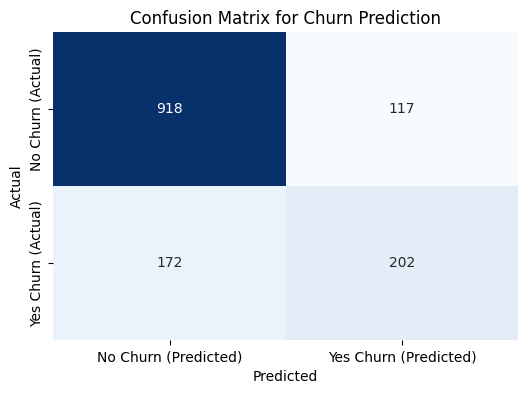

In [4]:
#Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Churn (Predicted)', 'Yes Churn (Predicted)'],
            yticklabels=['No Churn (Actual)', 'Yes Churn (Actual)'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Churn Prediction")
plt.show()


